In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math


In [3]:
def iterate_and_apply(dataframe, function, necesary_columns):
    perform = True
    step = 100000
    start = 0
    to = step
    
    while perform:
        new_columns = dataframe[start:to][necesary_columns].apply(function, axis=1)
        if len(new_columns) == 0:
            perform = False
        else:
            dataframe.update(new_columns)
        new_columns = None
        start += step
        to += step
    
    return dataframe


In [4]:
data = pd.read_csv('trip_data_1.csv', skipinitialspace=True)


In [6]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [18]:
data_fare = pd.read_csv('trip_fare_1.csv',skipinitialspace = True )

In [49]:
data_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0,0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0,0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0,0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0,0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0,0,10.5


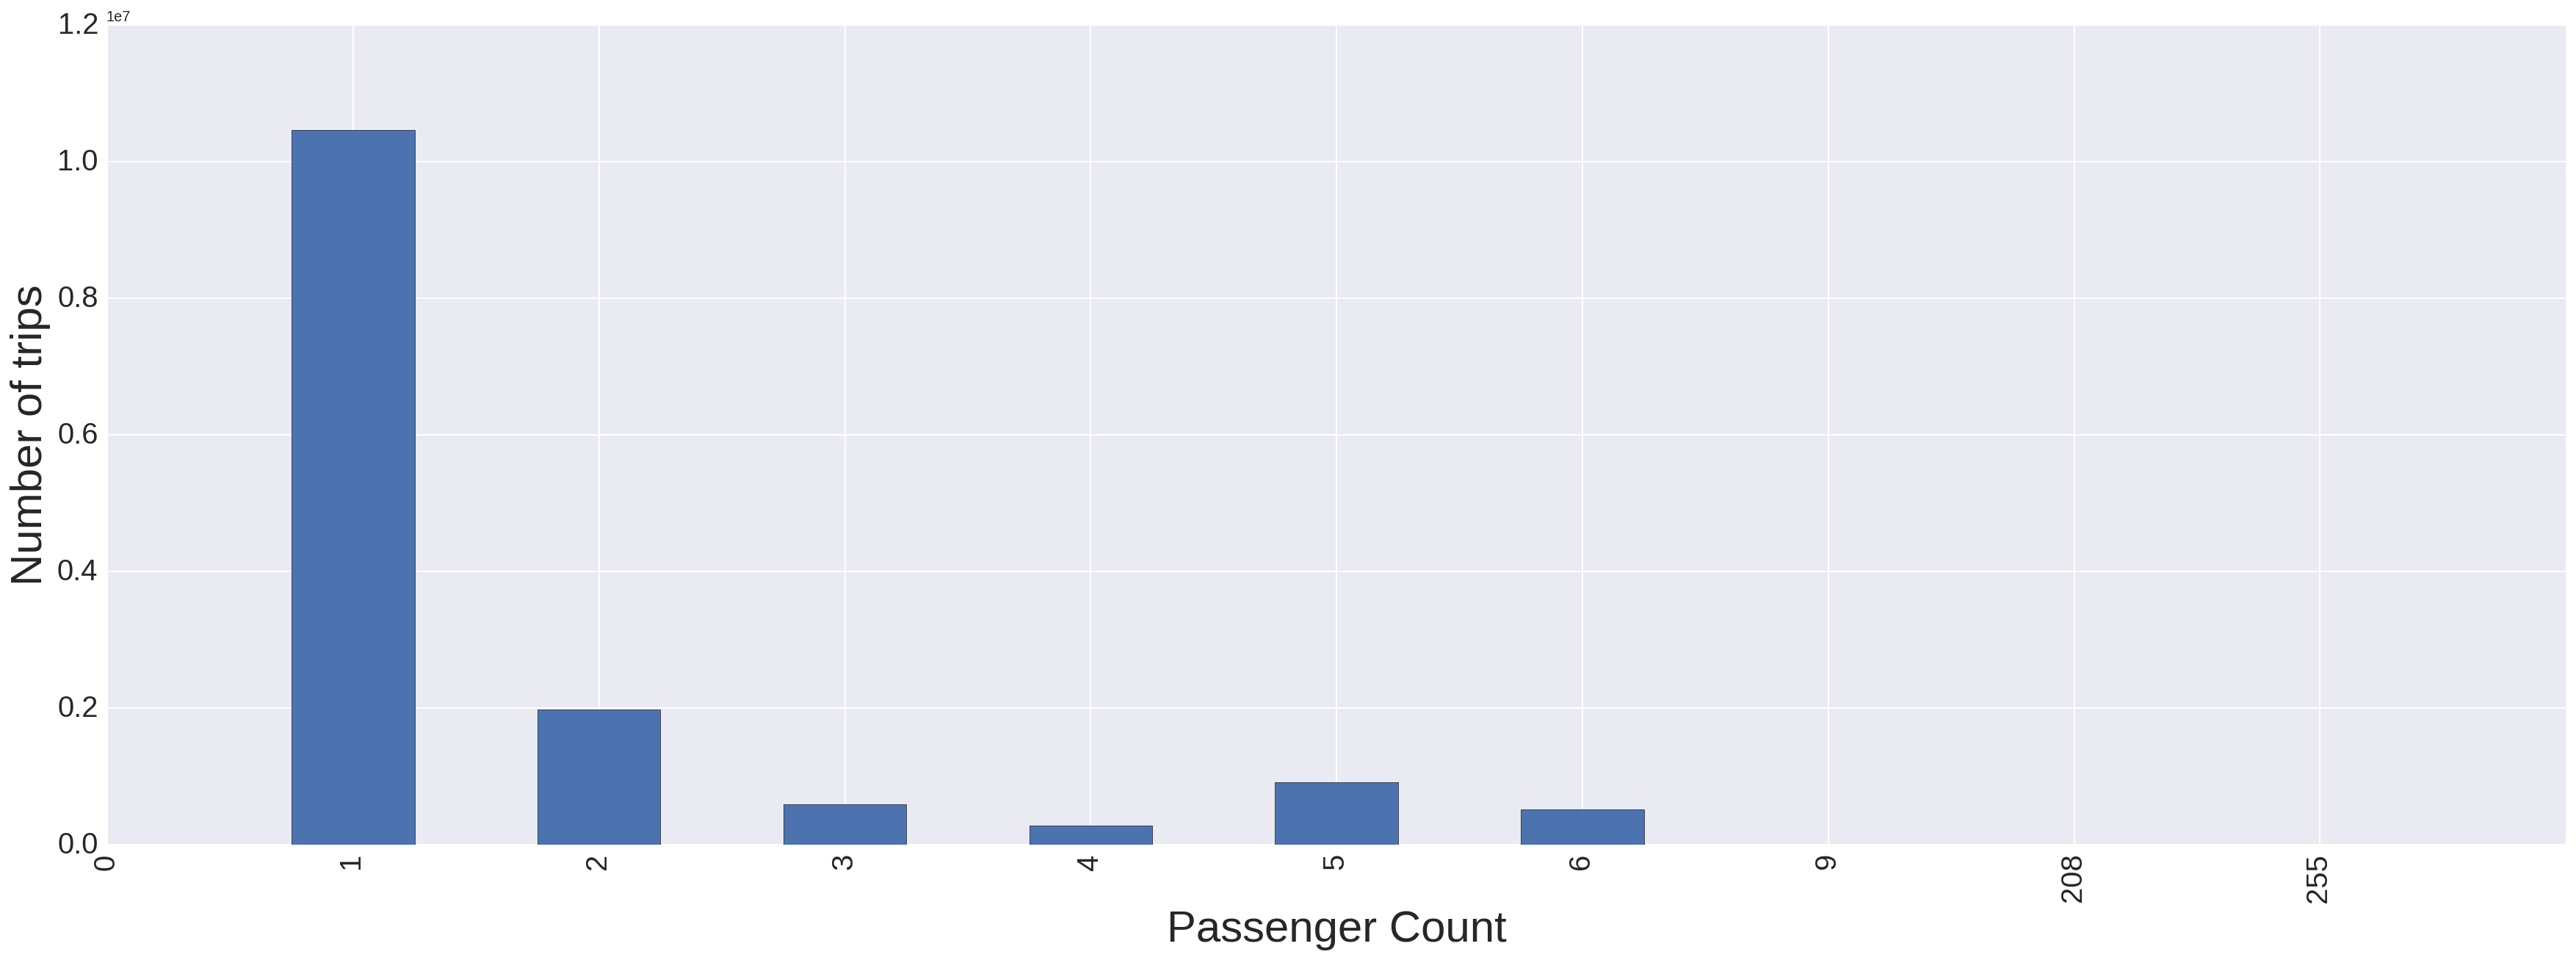

In [14]:
ax = data.groupby(['passenger_count']).size().plot(kind='bar', figsize=(30, 10))
ax.set_xlabel('Passenger Count', fontsize=30)
ax.set_ylabel('Number of trips', fontsize=30)
ax.tick_params(labelsize=20)
ax.set_xlim([0, 10])
plt.savefig('passenger_count.eps', format='eps', dpi=1000)

In [11]:
data['dist'] = data['trip_distance'].map(lambda x: math.ceil(x))

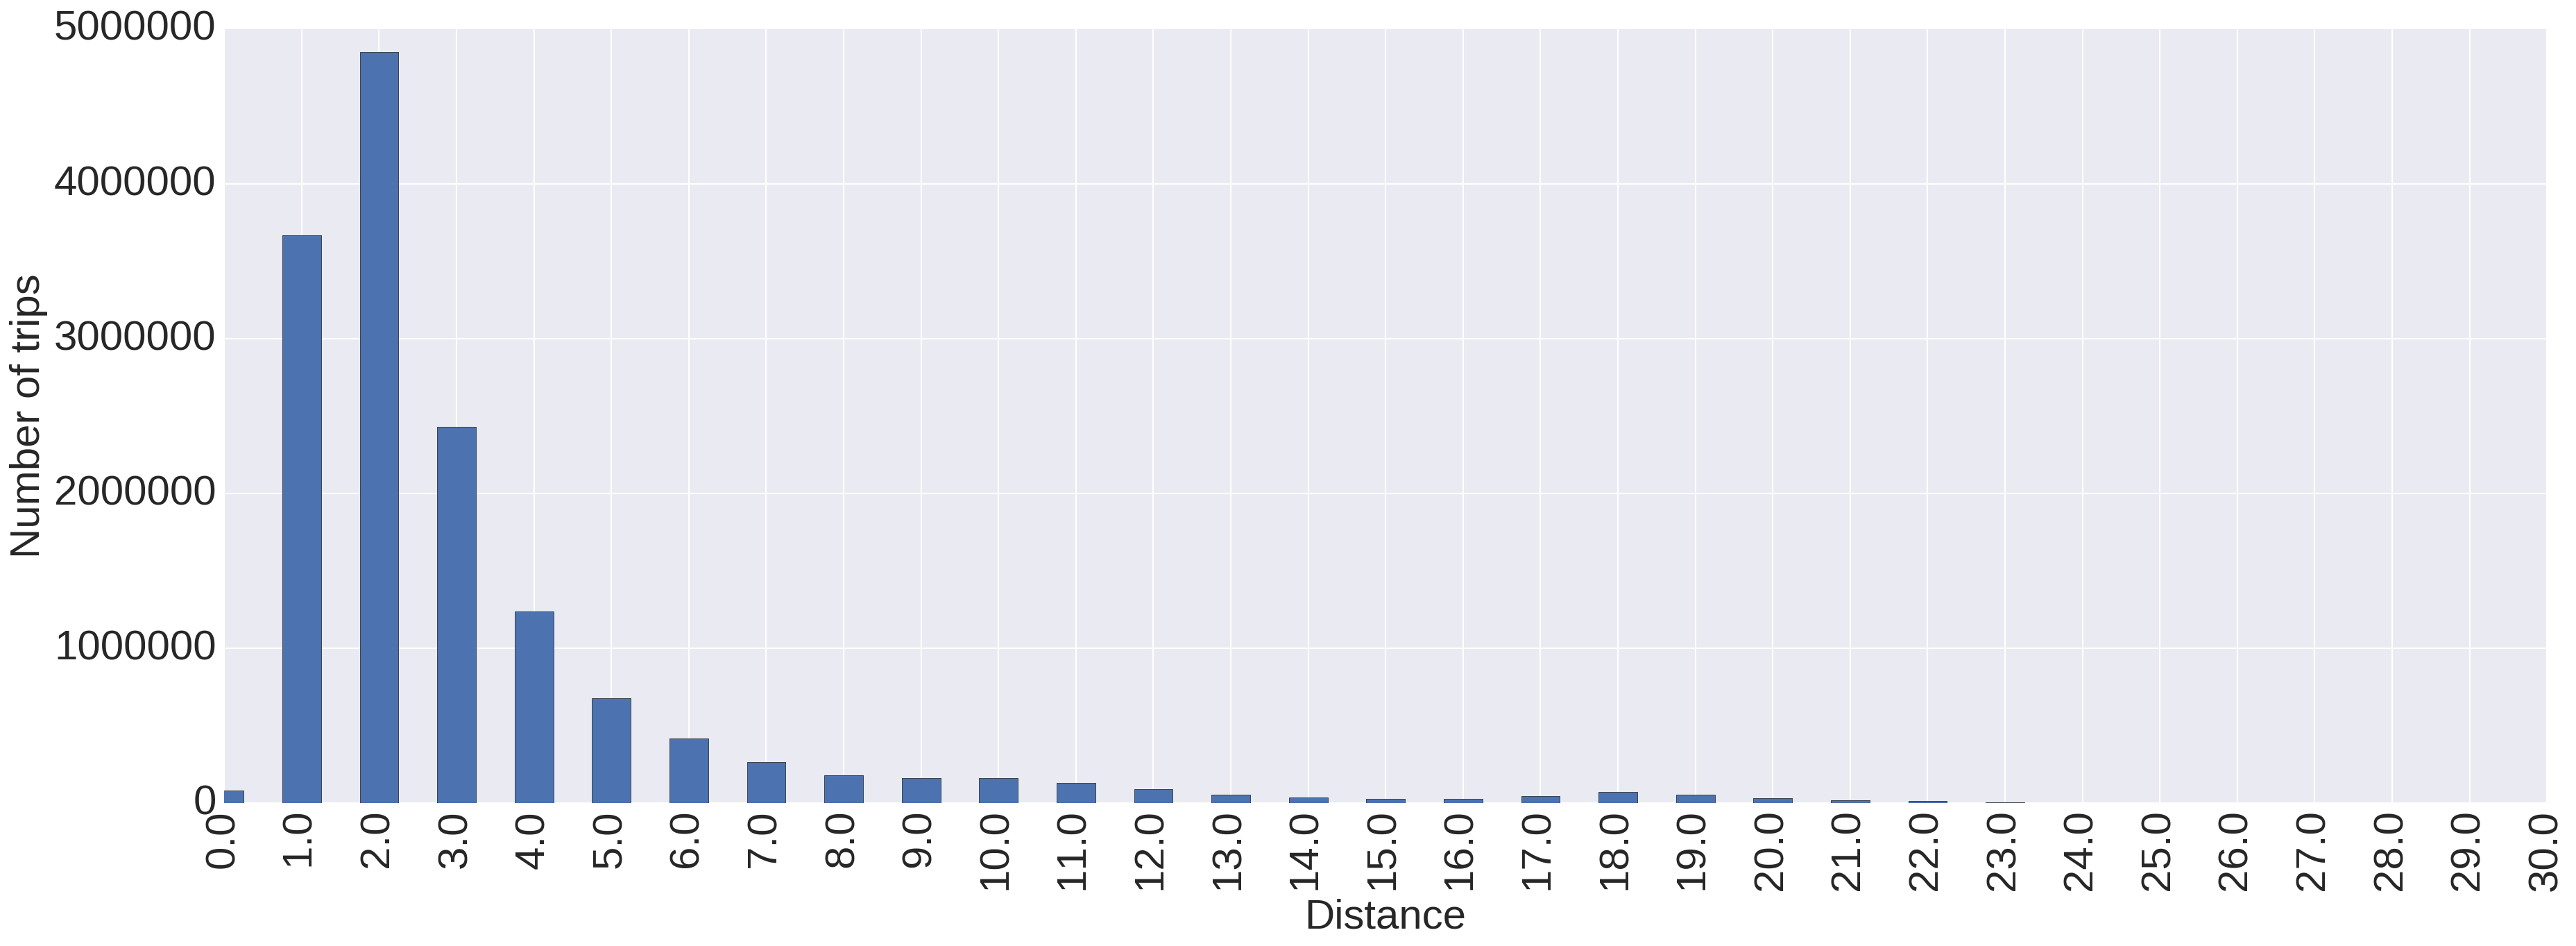

In [13]:
ax = data.groupby(['dist']).size().plot(kind='bar',figsize=(30, 10))
ax.set_xlabel('Distance', fontsize=30)
ax.set_ylabel('Number of trips', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_xlim([0, 30])
plt.savefig('distance.eps', format='eps', dpi=1000)

In [47]:
# (data['trip_time_in_secs']).quantile(0.99)

In [15]:
data['time_distribution'] = data['trip_time_in_secs'].map(lambda x: math.ceil(x * 1.0 /  (100.00))*100)

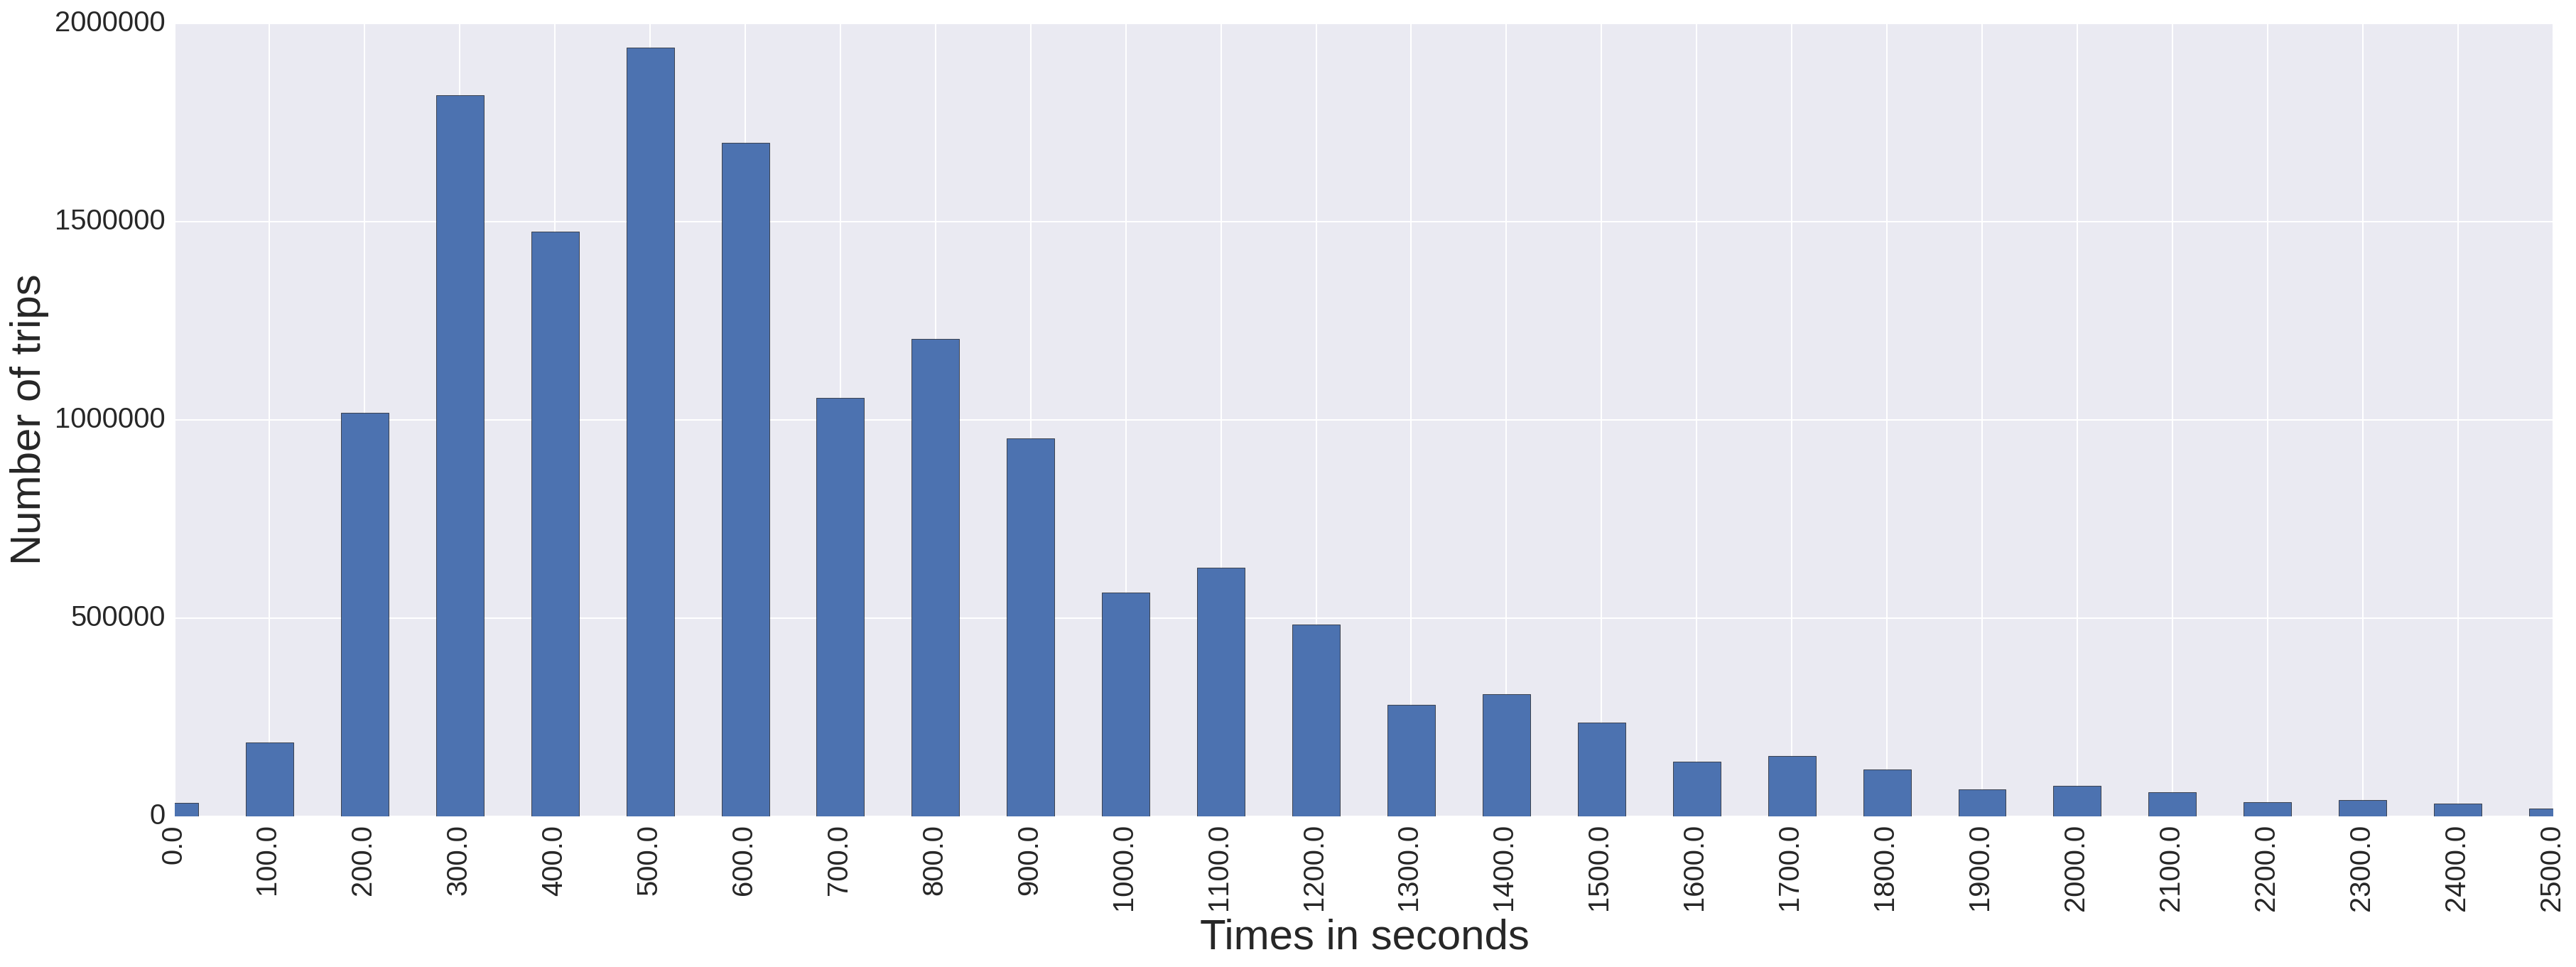

In [16]:
ax = data.groupby(['time_distribution']).size().plot(kind='bar', figsize=(30, 10))
ax.set_xlabel('Times in seconds', fontsize=30)
ax.set_ylabel('Number of trips', fontsize=30)
ax.tick_params(labelsize=20)
ax.set_xlim([0, 25])
plt.savefig('time.eps', format='eps', dpi=1000)

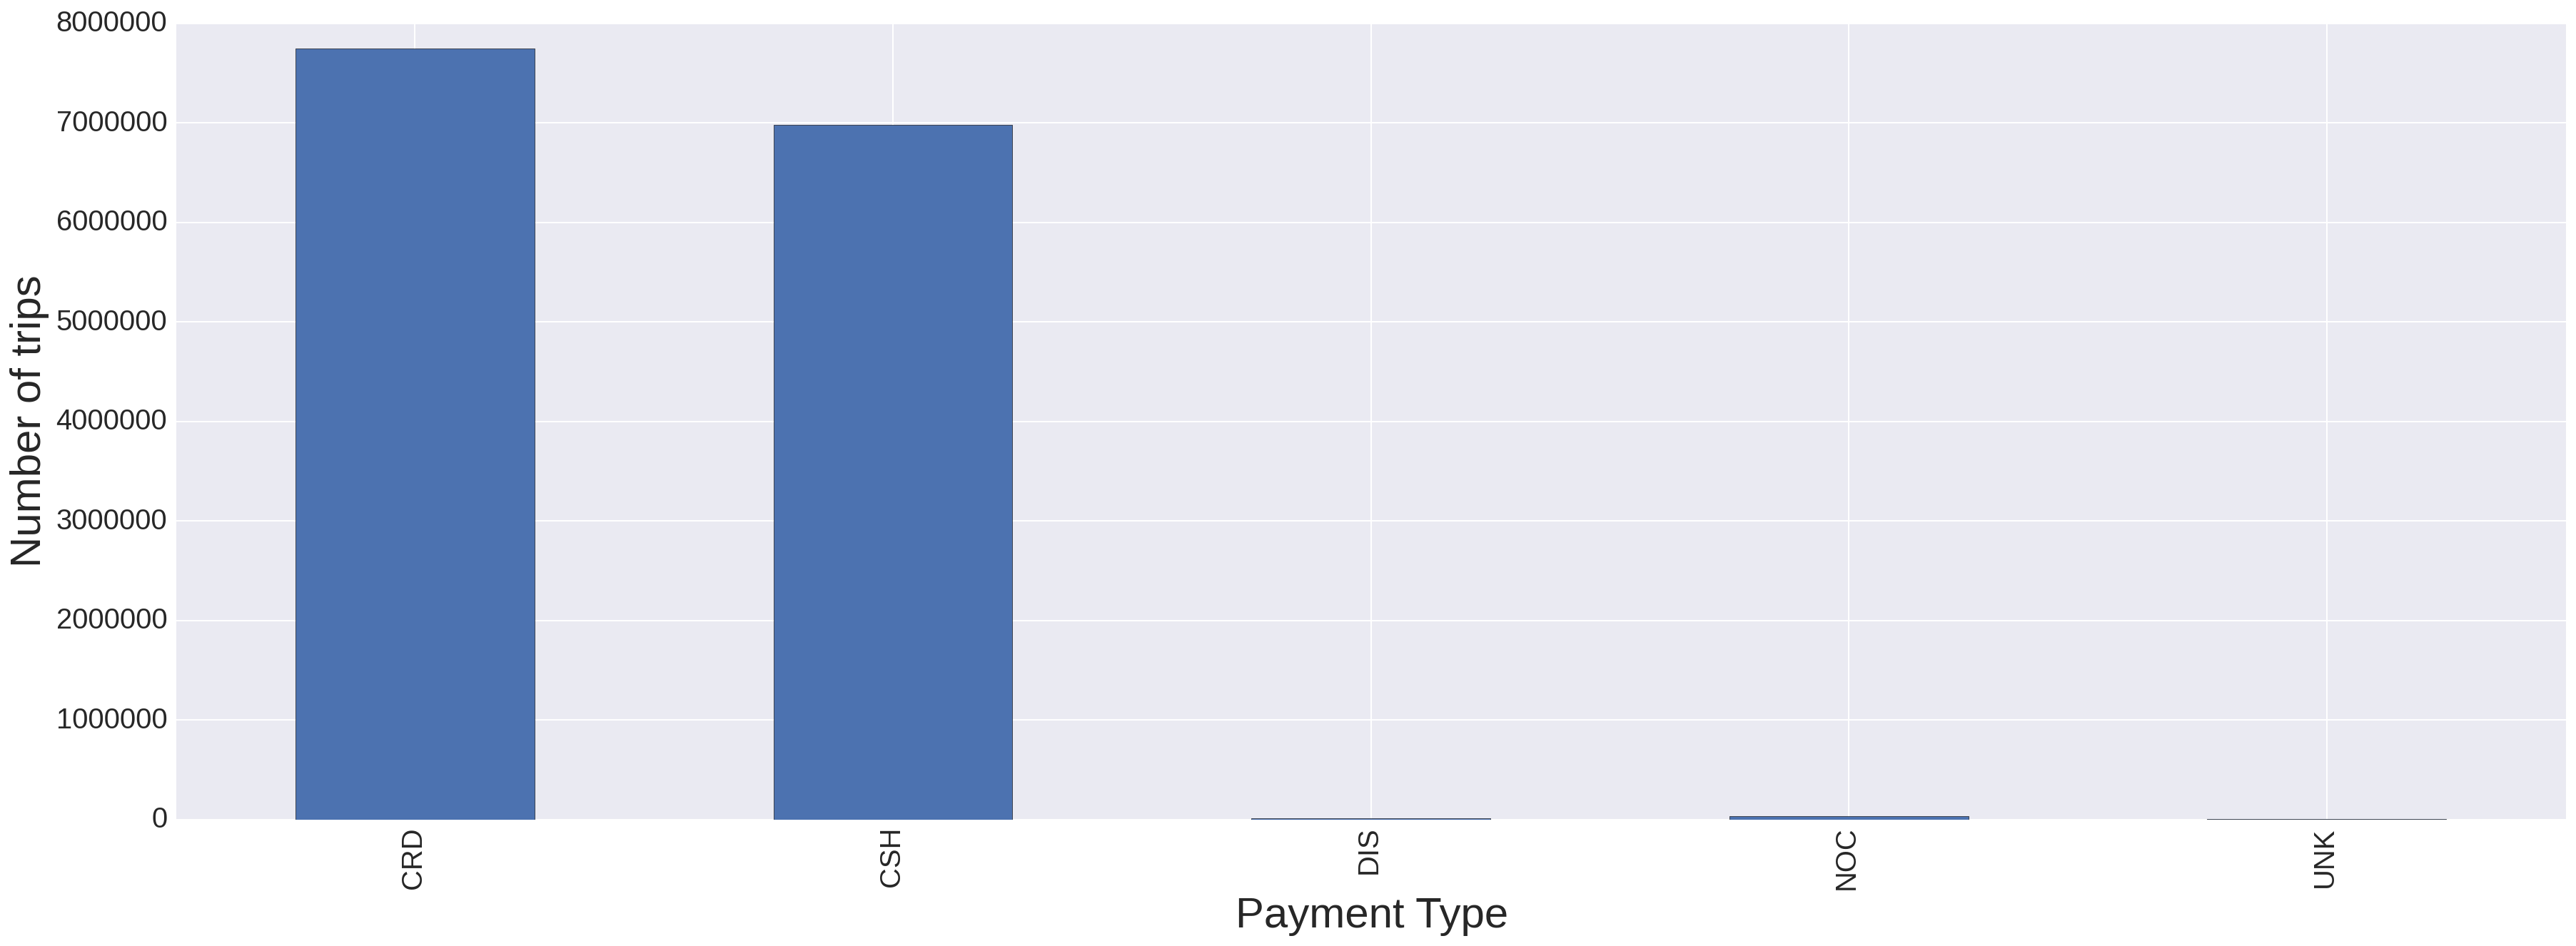

In [20]:
ax = data_fare.groupby(['payment_type']).size().plot(kind='bar', figsize=(30, 10))
ax.set_xlabel('Payment Type', fontsize=30)
ax.set_ylabel('Number of trips', fontsize=30)
ax.tick_params(labelsize=20)
plt.savefig('payment.eps', format='eps', dpi=1000)
#ax.set_xlim([0, 10])

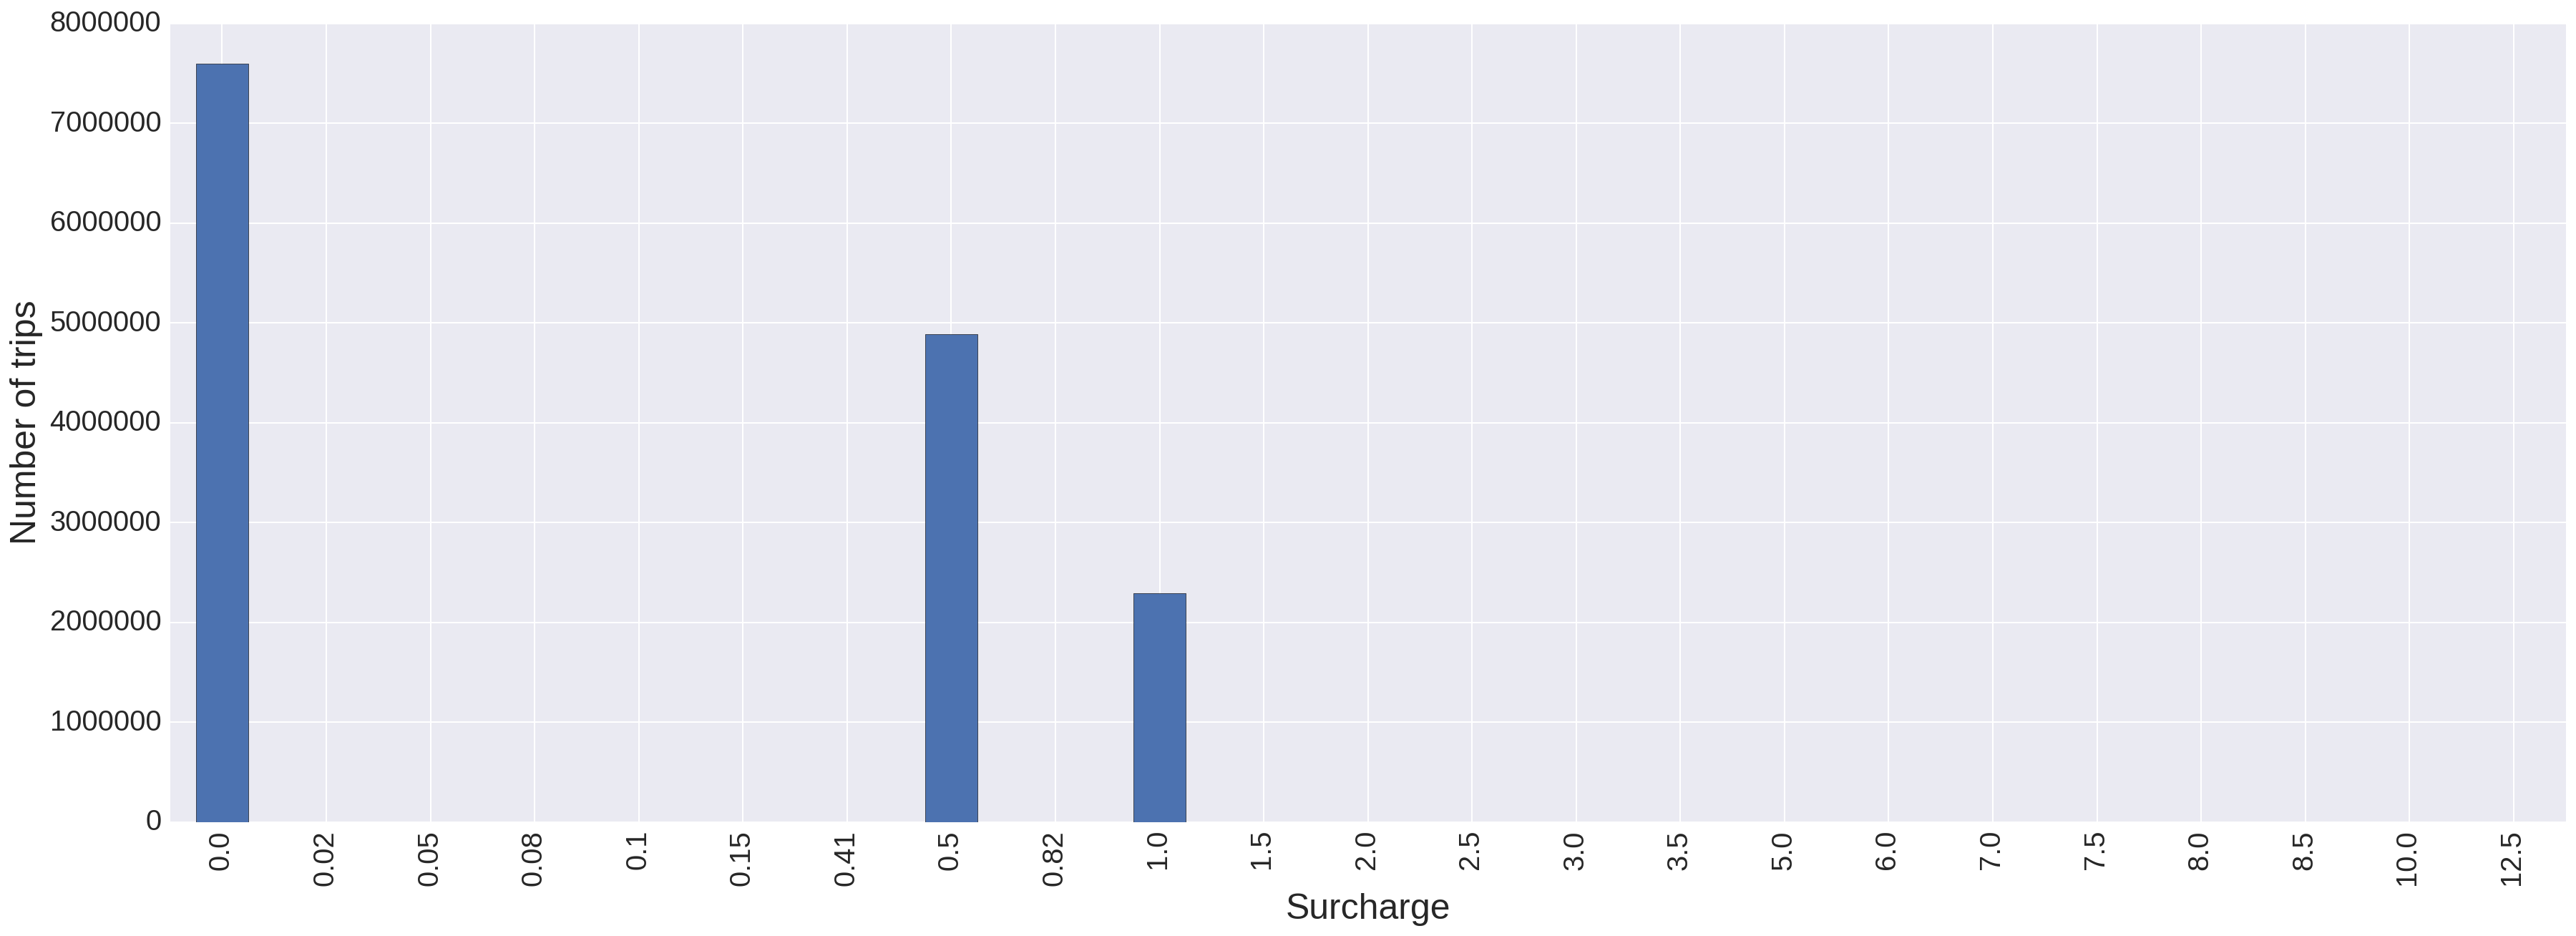

In [22]:
ax = data_fare.groupby(['surcharge']).size().plot(kind='bar', figsize=(30, 10))
ax.set_xlabel('Surcharge', fontsize=25)
ax.set_ylabel('Number of trips', fontsize=25)
ax.tick_params(labelsize=20)
plt.savefig('surcharge.eps', format='eps', dpi=1000)

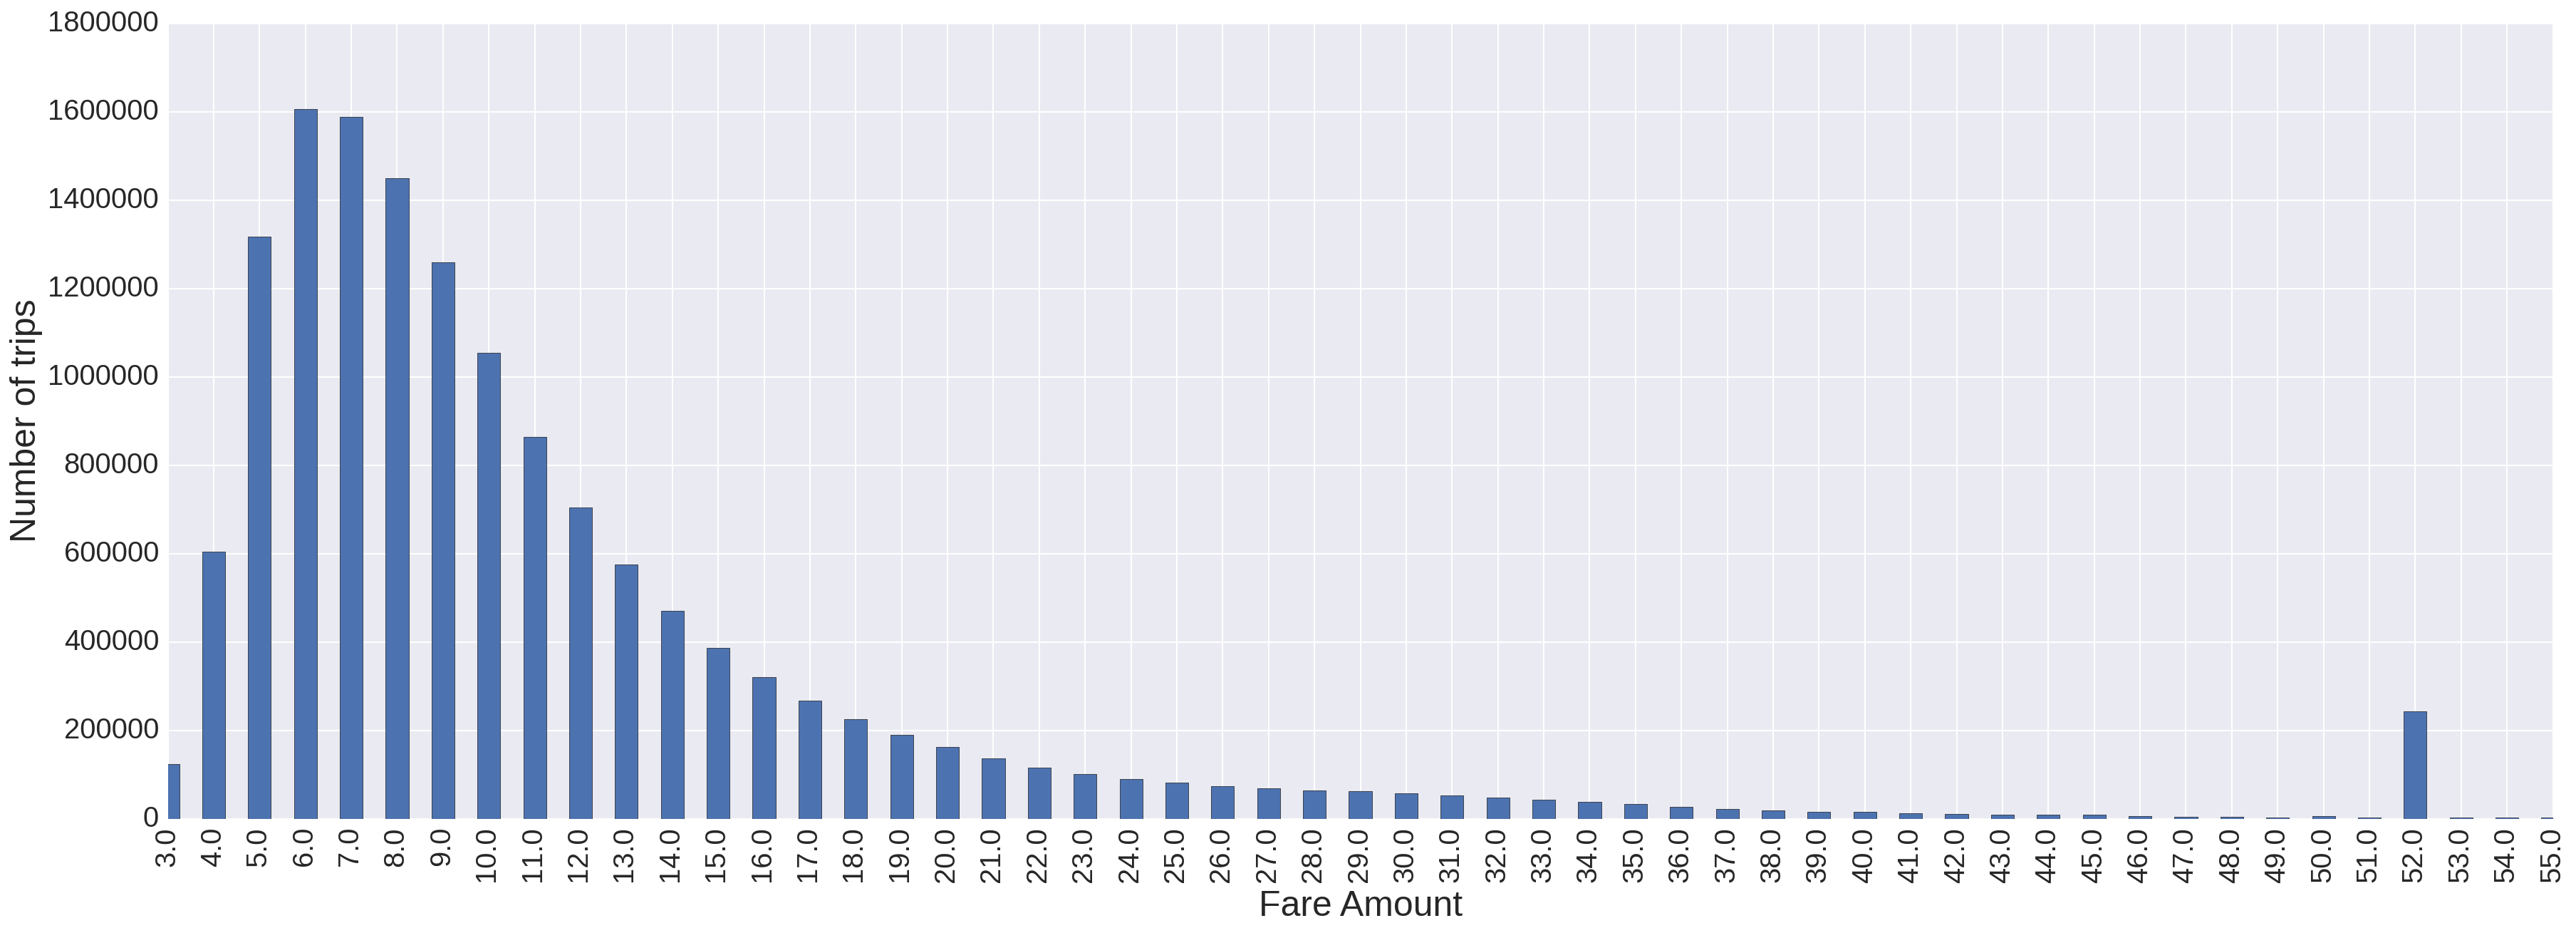

In [23]:
data_fare['fare_round'] = data_fare['fare_amount'].map(lambda x : math.ceil(x))
ax = data_fare.groupby(['fare_round']).size().plot(kind='bar', figsize=(30, 10))
ax.set_xlabel('Fare Amount', fontsize=25)
ax.set_ylabel('Number of trips', fontsize=25)
ax.set_xlim([0, 52])
ax.tick_params(labelsize=20)
plt.savefig('fare_amount.eps', format='eps', dpi=1000)

In [68]:
data.shape

(14776615, 16)

In [69]:
data_fare.shape

(14776615, 12)

32224

In [ ]:
result = pd.concat([data, data_fare], axis=1)

In [4]:
result.columns.get_loc("medallion")

NameError: name 'result' is not defined

In [5]:
result.columns

NameError: name 'result' is not defined